
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

## Práctica 1. Tipos de Imágenes (Parte I)

OpenCV permite trabajar con imágenes desde disco mediante la función *imread*  para leer y con *imwrite* para escribir en un fichero. Estas funciones soportan varios formatos de archivo para imágenes (BMP, PNG, JPEG y TIFF entre otros).

Una imagen no es más que un vector multidimensional, dado por filas y columnas.  En cada celda definida por una fila y columna se almacena un pixel.

Un ejemplo simple de imagen sería una imagen negra de 3x3. Para ello podemos usar un vector 2d de NumPy.

In [1]:
import numpy as np
img=np.zeros((3,3),dtype=np.uint8)

print(img)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


En este ejemplo cada pixel se representa por un entero de 8 bit, lo que significa que los valores de cada pixel están en el rango 0-255. 0 es negro y 255 es blanco. Un valor entre [0,255] son los valores de gris. 
<img src="fig1.png">

Podemos convertir una imagen de niveles de gris a RGB usando la función *cv2.cvtColor*

In [2]:
import cv2
img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


Cada pixel se representa por un vector de 3 elementos. Así cada tripleta representa cada uno de los tres valores de los canales de color: B, G y R respectivamente. Otros modelos de color, tales como HSV, se representan de la misma forma, salvo con diferentes rangos de valores. 

Para conocer la estructura de una imagen podemos acceder a la propiedad *shape*, que devuelve las filas y columnas, y el número de canales (si existe mas de 1).

In [3]:
import numpy as np
img = np.zeros((5,3),dtype=np.uint8)
print(img.shape)

(5, 3)


Las imágenes puede ser cargadas de un formato de imagen y salvarlas en otro formato en disco. Por ejemplo podemos convertir una imagen PNG a JPEG

In [4]:
import cv2
image=cv2.imread('barbara.png')
#Como escribir una imagen en disco
cv2.imwrite('barbara.jpg',image)


True

Por defecto *imread* devuelve una imagen en formato BGR incluso si el archivo usa un formato de escala de grises. 
Opcionalmente podemos especificar el modo de *imread*. Las opciones que se soportan son:

* cv2.IMREAD_COLOR: Es la opción por defecto, produciendo una imagen con 3 canales BGR con 8 bit por cada canal. 
* cv2.IMREAD_GRAYSCALE: Produce una imagen de niveles de gris de 8-bits
* cv2.IMREAD_ANYCOLOR: Produce una imagen BGR de 8 bits por canal o una imagen de niveles de gris de 8-bit, dependiendo de los metadatos del archivo.
* cv2.IMREAD_UNCHANGED: Lee los datos de la imagen, incluyendo el canal alfa (transparencia) como un cuarto canal.
* cv2.IMREAD_ANYDEPTH: Esto carga una imagen en niveles de gris a su original profundidad de bits. Por ejemplo, produce una imagen de niveles de gris con 16 bit por canal si el archivo representa una imagen con este formado. 
* cv2.IMREAD_ANYDEPTH|cv2.IMREAD_COLOR: Carga una imagen en BGR con su profundidad original. 
* cv2.IMREAD_REDUCED_GRAYSCALE_2: Carga la imagen en niveles de gris a la mitad de resolución. Por ejemplo si la imagen es de 640x480, carga la imagen como 320x240.
* cv2.IMREAD_REDUCED_COLOR_2: Carga una imagen de 8 bit por canal BGR pero a media resolución.
* cv2.IMREAD_REDUCED_GRAYSCALE_4: Carga la imagen en niveles de gris a un cuarto de resolución. 
* cv2.IMREAD_REDUCED_COLOR_4: Carga una imagen de 8 bit por canal BGR pero a un cuarto de resolución.
* cv2.IMREAD_REDUCED_GRAYSCALE_8: Carga la imagen en niveles de gris a un 1/8 de resolución. 
* cv2.IMREAD_REDUCED_COLOR_8: Carga una imagen de 8 bit por canal BGR pero a un 1/8 de resolución.



(512, 716, 3)
(512, 716)
Pixel en color  [ 11 147 123]
Pixel en gris  124


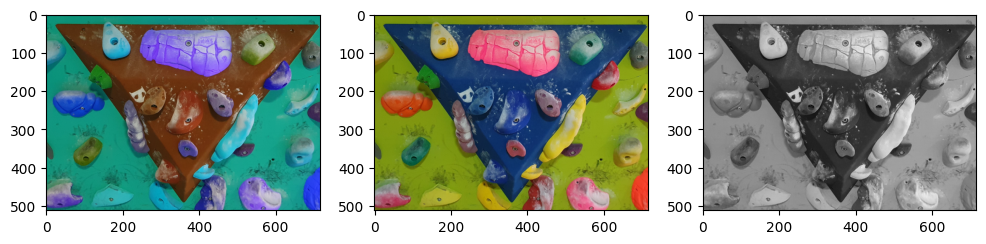

In [5]:
import cv2
from matplotlib import pyplot as plt
img_color=cv2.imread('roco.png')
cv2.imshow('imagen Color',img_color)
img_gray=cv2.imread('roco.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow('imagen GRIS',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Otra forma de visualizar las imagenes
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img_color)

#imshow de pyplot usa RGB en vez de BGR como opencv para converitr BGR a RGB
img_colorgb=cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.subplot(1,3,2)
plt.imshow(img_colorgb)

plt.subplot(1,3,3)
plt.imshow(img_gray,'gray')

#Ver que estructura tiene las imágenes
print(img_color.shape)
print(img_gray.shape)

#Accedemos a un pixel concreto
print("Pixel en color ",img_color[0,0])
print("Pixel en gris ",img_gray[0,0])

Sobre una imagen de color podemos visualizar los diferente canales. Hay que tener en cuenta que estos canales son imágenes de niveles de gris. La intensidad con la que se presenta un nivel de gris en un pixel de un canal indica la fuerza del color en el  canal. Además podemos construir una imagen de color usando imágenes de niveles de gris.

Text(0.5, 1.0, 'Azul')

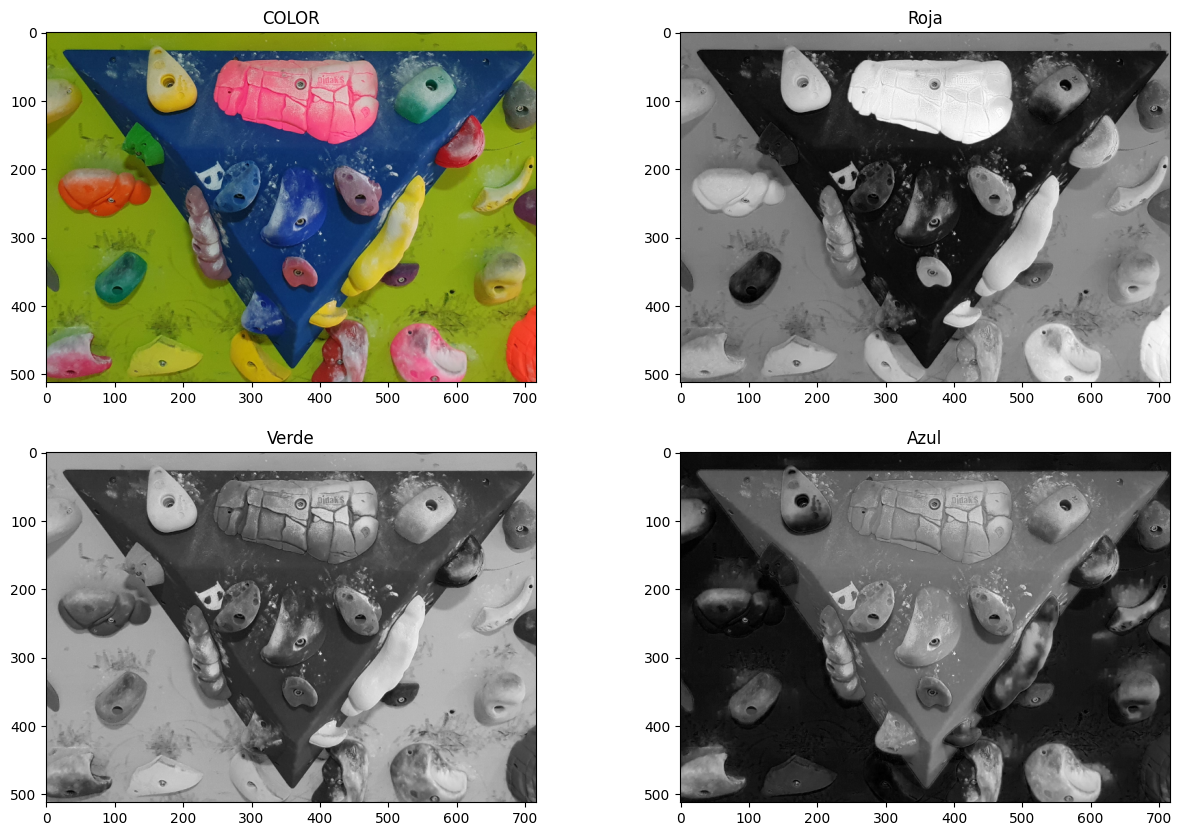

In [6]:
import cv2
from matplotlib import pyplot as plt
img_color=cv2.imread('roco.png')
img_colorgb=cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
rojo = img_colorgb[:,:,0]
verde= img_colorgb[:,:,1]
azul = img_colorgb[:,:,2]
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_colorgb)
plt.title("COLOR")
plt.subplot(2,2,2)
plt.imshow(rojo,'gray')
plt.title("Roja")
plt.subplot(2,2,3)
plt.imshow(verde,'gray')
plt.title("Verde")
plt.subplot(2,2,4)
plt.imshow(azul,'gray')
plt.title("Azul")

Ahora creamos una nueva imagen de color con los canales disponiéndolos en otro orden

Text(0.5, 1.0, 'PSEUDO-COLOR')

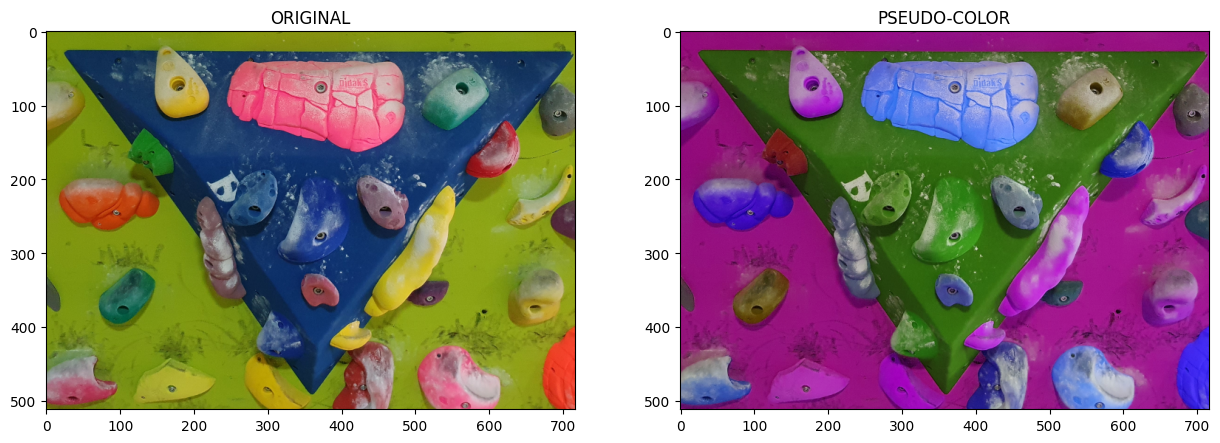

In [7]:
import cv2
from matplotlib import pyplot as plt
img_color=cv2.imread('roco.png')
img=cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("ORIGINAL")

img_nueva=cv2.merge([img[:,:,1],img[:,:,2],img[:,:,0]],3)
plt.subplot(1,2,2)
plt.imshow(img_nueva)
plt.title("PSEUDO-COLOR")


#### Aplicar diferentes mapas de colores
Podemos colorear una imagen de diferentes formas. Simplemente intercambiando la posición de los canales damos origen a un nuevo coloreo de la imagen. A la forma de transformar los colores de un pixel se le denomina mapa de color (colormap). OpenCV2 tiene definidos direntes mapas de colores:

Value	Name	      
0	COLORMAP_AUTUMN	  
1	COLORMAP_BONE	  
2	COLORMAP_JET	  
3	COLORMAP_WINTER	  
4	COLORMAP_RAINBOW  
5	COLORMAP_OCEAN	  
6	COLORMAP_SUMMER	
7	COLORMAP_SPRING	
8	COLORMAP_COOL	
9	COLORMAP_HSV	
10	COLORMAP_PINK	
11	COLORMAP_HOT	
en https://learnopencv.com/applycolormap-for-pseudocoloring-in-opencv-c-python/ se puede ver el mapa de color. 
Un ejemplo de como aplicarlo en OpenCV se puede ver a continuación:

In [8]:
import cv2
from matplotlib import pyplot as plt
img_color=cv2.imread('roco.png')
im_hot = cv2.applyColorMap(img_color, cv2.COLORMAP_HOT)
im_jet = cv2.applyColorMap(img_color, cv2.COLORMAP_JET)
im_spring = cv2.applyColorMap(img_color, cv2.COLORMAP_SPRING)

cv2.imshow('Original', img_color)
cv2.imshow('JET', im_jet)
cv2.imshow('HOT', im_hot)
cv2.imshow('SPRING', im_spring)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

##### Convertir la forma

Python contiene la función *bytearray* que te permite convertir un array multidimensional de tipo byte a 1D. Así podemos crear un vector de tipo byte y con ello por ejemplo construir una imagen como hacemos a continuación

In [9]:
import cv2
import numpy as np
import os
#Creamos un array de valores aleatorios
ranByteArray= bytearray(os.urandom(120000))
array_plano=np.array(ranByteArray)

#Convertimos el array para hacer una imagen de 400x300 de niveles de gris
grayImage=array_plano.reshape(300,400)
cv2.imshow("Imagen ruido",grayImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Convertir el array a una imagen de color 400x100
bgrImage=array_plano.reshape(100,400,3)
cv2.imshow("imagen ruido a color",bgrImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Conversión en tipo 
Podemos cambiar el tipo base (uint8,float,etc) de la  imagen usando la función *cv2.normalize*. Los parámetro son:
* la imagen original
* la imagen resultante
* el valor mínimo que queremos obtener en la salida
* el valor máximo que queremos obtener en la salida
* el tipo de normalización. Si usamos la normalización del tipo :
    out=(img(i)-min(img))/(max(img)-min(img))
  debemos poner cv2.NORM_MINMAX



(512, 716)
Maximo  225
Minimo  5


Text(0.5, 1.0, 'Recuperada en uint8')

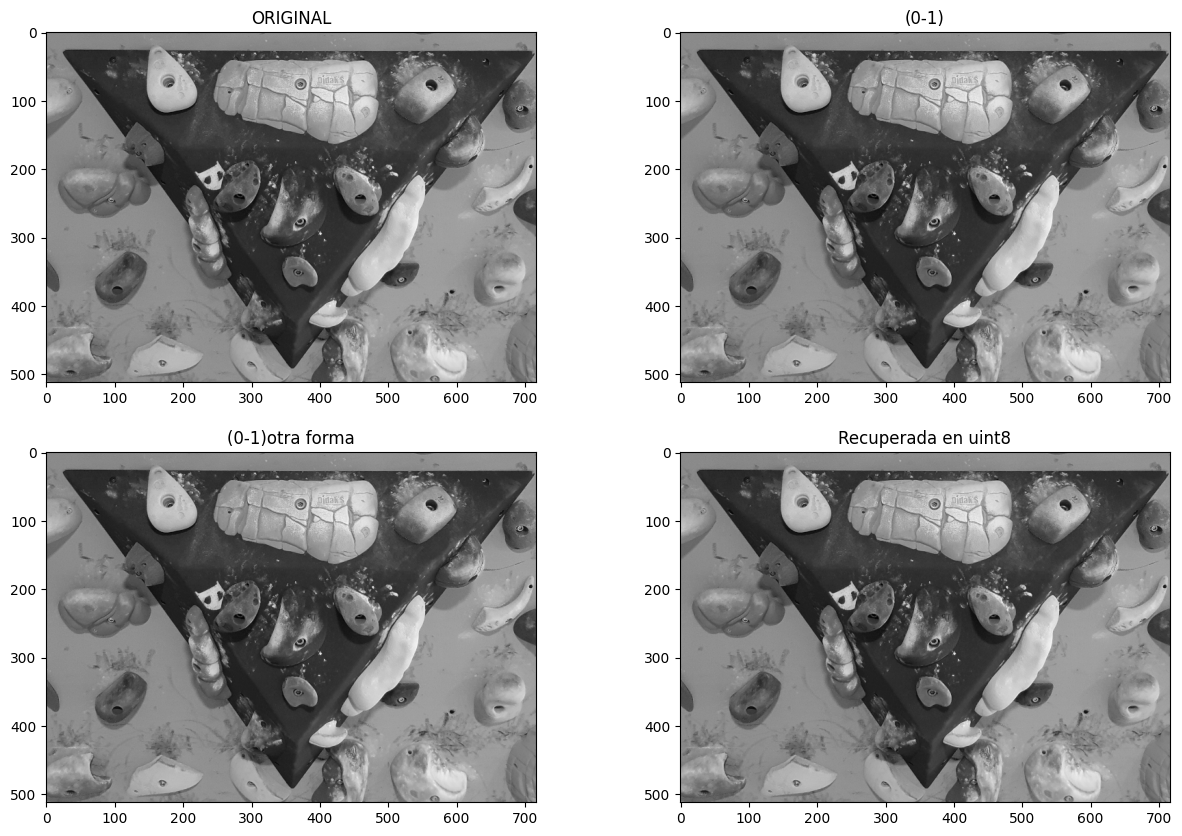

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img_color1=cv2.imread('roco.png')
img_color=cv2.cvtColor(img_color1, cv2.COLOR_BGR2RGB)
cv2.imshow('imagen Color',img_color1)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_gray=cv2.cvtColor(img_color,cv2.COLOR_RGB2GRAY)
print(img_gray.shape)
out=cv2.normalize(img_gray.astype('float'),None,0.0,1.0,cv2.NORM_MINMAX)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_gray,"gray")
plt.title("ORIGINAL")
plt.subplot(2,2,2)
plt.imshow(out,"gray")
plt.title("(0-1)")

#Otra forma de normalizar 
#obtiene los limites para un tipo entero (min,max)
info=np.iinfo(img_gray.dtype)
out2=img_gray.astype(np.float64)/info.max
plt.subplot(2,2,3)
plt.imshow(out2,"gray")
plt.title("(0-1)otra forma")

#Recupenrando el rango 0-256
out3=out2*255
out3=out3.astype(np.uint8)
print("Maximo ",np.max(out3))
print("Minimo ",np.min(out3))
plt.subplot(2,2,4)
plt.imshow(out3,"gray")
plt.title("Recuperada en uint8")



#### Modificando los valores 

In [6]:
import cv2
img_color=cv2.imread('roco.png')
#Poner a 0 todo los valores del canal verde (BGR)
img_color[:,:,1]=0
cv2.imshow('imagen con verde a 0',img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


Otra posibilidad de acceder de forma directa a un rango de valores dentro de la imagen es para definir regiones de interés (ROI). Por ejemplo en el siguiente ejemplo vamos a crea una nueva imagen con un trozo de una imagen de partida para luego pegar este trozo en otra posición.

In [12]:
import cv2
img_color=cv2.imread('roco.png')
mi_region=img_color[0:100,0:100];
img_color[300:400,300:400]=mi_region
cv2.imshow('imagen con verde a 0',img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


Podemos acceder a las propiedades de un numpy.array (que es como cv2 mantiene las imágenes en memoria). Así podemos ver la forma con *shape*, el tamaño con *size* y el tipo base de la imagen con *dtype*

In [13]:
import cv2
img_color=cv2.imread('roco.png')
print("Forma:",img_color.shape)
print("Tamaño:",img_color.size)
print("Tipo base: ",img_color.dtype)


Forma: (512, 716, 3)
Tamaño: 1099776
Tipo base:  uint8


## EJERCICIOS ##

<ul>
<li>Sobre la imagen *woman.png* 
<ol>
    <li>Mostrar los  canales rojo,verde y azul
    <li>Obtener diferentes coloreados usando el mapa de color JET, SPRING, etc y mostrarlos
    <li>Anular la banda roja de la imagen y mostrarla.
</ol>
<li>Crear una imagen de 100x100 en el que las filas 0-25 tengan el valor 0, las filas en el rango 26-50 tenga el valor 64, las filas en el rango 51-75 tenga el valor 128 y las filas en el rango 76-100 tengan el valor 255. A continuación convertir la imagen al rango 0-1. Mostrar ambas imagenes.    
</ul>    

In [3]:
import cv2
import numpy as np

woman_img = cv2.imread("woman.png")

blue_image = np.zeros_like(woman_img)
green_image = np.zeros_like(woman_img)
red_image = np.zeros_like(woman_img)

blue_image[:, :, 0] = woman_img[:, :, 0]
green_image[:, :, 1] = woman_img[:, :, 1]
red_image[:, :, 2] = woman_img[:, :, 2]

cv2.imshow('Blue', blue_image)
cv2.imshow('Green', green_image)
cv2.imshow('Red', red_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
colormaps = [
    ('HOT', cv2.COLORMAP_HOT),
    ('JET', cv2.COLORMAP_JET),
    ('SPRING', cv2.COLORMAP_SPRING),
    ('AUTUMN', cv2.COLORMAP_AUTUMN),
    ('BONE', cv2.COLORMAP_BONE),
    ('WINTER', cv2.COLORMAP_WINTER),
    ('RAINBOW', cv2.COLORMAP_RAINBOW),
    ('OCEAN', cv2.COLORMAP_OCEAN)
]

for name, colormap in colormaps:
    colored_image = cv2.applyColorMap(woman_img, colormap)
    cv2.imshow(f'ColorMap {name}', colored_image)    

cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
no_red = woman_img
no_red[:, :, 2] = 0
cv2.imshow('Without red', no_red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
new_image = np.zeros((100, 100), dtype=np.uint8)
print(new_image.shape)

new_image[0:26, :] = 0
new_image[26:51, :] = 64
new_image[51:76, :] = 128
new_image[76:, :] = 255

cv2.imshow("Image from ex2", new_image)    
new_image_normalized = new_image.astype(float) / 255.0
cv2.imshow("Image from ex2 - 0 to 1 range", new_image_normalized)    
cv2.waitKey(0)
cv2.destroyAllWindows()

(100, 100)
